# Q1

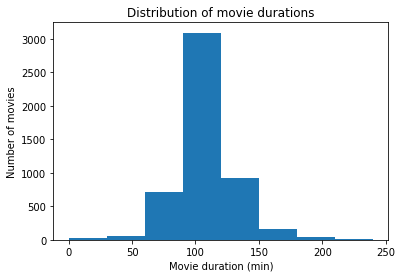

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = "../movie_metadata.csv"

df = pd.read_csv(path)
durations = df[df['duration'] <= 240.0]['duration'].to_numpy()

plt.figure()
plt.hist(durations, bins=[30*x for x in list(range(0,9))])
plt.xlabel('Movie duration (min)')
plt.ylabel('Number of movies')
plt.title('Distribution of movie durations')
plt.show()

# Q2

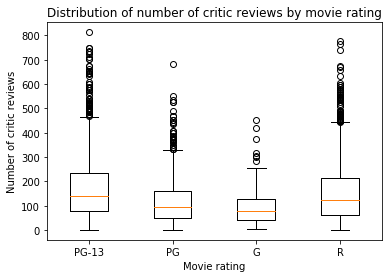

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = "../movie_metadata.csv"

df = pd.read_csv(path)

pg_13 = df[df['content_rating'] == 'PG-13']['num_critic_for_reviews'].to_numpy()
pg_13 = pg_13[~np.isnan(pg_13)]

pg = df[df['content_rating'] == 'PG']['num_critic_for_reviews'].to_numpy()
pg = pg[~np.isnan(pg)]

g = df[df['content_rating'] == 'G']['num_critic_for_reviews'].to_numpy()
g = g[~np.isnan(g)]

r = df[df['content_rating'] == 'R']['num_critic_for_reviews'].to_numpy()
r = r[~np.isnan(r)]

data = [np.reshape(pg_13, (-1,1)), np.reshape(pg, (-1,1)), np.reshape(g, (-1,1)), np.reshape(r, (-1,1))]

plt.figure()
plt.boxplot(data)
plt.ylabel('Number of critic reviews')
plt.xticks([1,2,3,4],['PG-13','PG','G','R'])
plt.xlabel('Movie rating')
plt.title('Distribution of number of critic reviews by movie rating')
plt.show()

Insights: The average number of critic reviews for both PG-13 and R-rated movies are about the same, while PG and G average less reviews. G-rated movies receive the least number of critic reviews, followed by PG, then PG-13 and R in a relative tie. All rating categories have a high number of outliers, likely representing the relatively small number of critically-acclaimed movies in each category.

# Q2

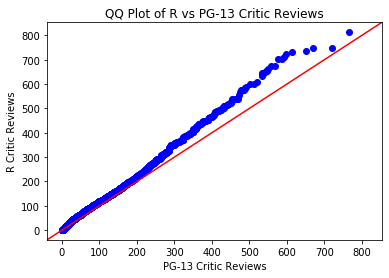

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

path = "../movie_metadata.csv"

df = pd.read_csv(path)

pg_13 = df[df['content_rating'] == 'PG-13']['num_critic_for_reviews'].to_numpy()
pg_13 = pg_13[~np.isnan(pg_13)]

r = df[df['content_rating'] == 'R']['num_critic_for_reviews'].to_numpy()
r = r[~np.isnan(r)]

sm.qqplot_2samples(pg_13, r, line='45')
plt.xlabel('PG-13 Critic Reviews')
plt.ylabel('R Critic Reviews')
plt.title('QQ Plot of R vs PG-13 Critic Reviews')
plt.show()

Insights: the scatter plot of the quantiles from the two sets forms a roughly linear line, suggesting that the distributions are linearly related. For movies with less than about 300 reviews, the distributions are quite similar based on the fact that they approximately lie on the line y=x. Above 300 reviews, the distributions are less similar, though the fact that they still lie on a non-y=x line suggests the distributions are linearly related. Because the general trend is steeper than the y=x line, the distributions of R critic reviews is more dispersed than that of PG-13 reviews.

# Q4

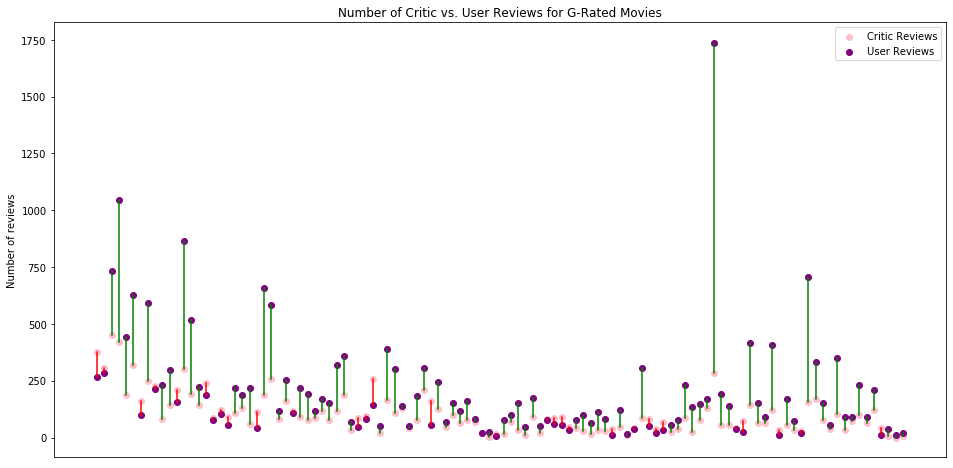

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = "../movie_metadata.csv"

df = pd.read_csv(path)

g_critic = df[df['content_rating'] == 'G']['num_critic_for_reviews'].to_numpy()
g_critic = np.nan_to_num(g_critic)

g_user = df[df['content_rating'] == 'G']['num_user_for_reviews'].to_numpy()
g_user = np.nan_to_num(g_user)

plt.figure(figsize=(16,8))
plt.scatter(list(range(0,len(g_critic))), g_critic, c='pink', label='Critic Reviews')
plt.scatter(list(range(0,len(g_user))), g_user, c='purple', label='User Reviews')
for i in range(0,len(g_user)):
    if (g_user[i] >= g_critic[i]):
        plt.plot([i, i], [g_critic[i], g_user[i]], 'g-')
    else:
        plt.plot([i, i], [g_critic[i], g_user[i]], 'r-')
plt.legend()
plt.ylabel('Number of reviews')
plt.xticks([], [])
plt.title('Number of Critic vs. User Reviews for G-Rated Movies')
plt.show()

Insights: Movies tend to have more user reviews than critic reviews, which is unsurprising given the fact that there usually the largest proportion of viewers of a movie are not critics. It also appears that in most cases the number of user reviews increases exponentially relative to the number of critic reviews of that movie, again reflecting the usual proportion of non-critic-to-critic viewers of movies. Movie where the critic reviews outnumber user reviews occur almost exclusively when the movie has very few reviews relative to the average number of reviews per movie. (NOTE: Green lines represent when number of user reviews > number of critic reviews, and red lines represent user reviews < critic reviews)